# Overview

Linear regression model: $f_{w,b} = w_0x_0 + w_1x_1 + ...+b$

What if features/data are non-linear or are combination of features?

## Polynomial features

Let's try using what we've known so far to fit a non-linear curve. Let's take a simple quadratic: $y = 1 + x^2$

In [293]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20,1)
y=1+x**2

X=x.reshape(-1,1) #Converted into 2D array

In [294]:
# compute cost
def cost_func(X,y,w,b):
    cost=0.0

    m=X.shape[0]

    for i in range(m):
        f_wb_i=np.dot(w,X[i])+b
        cost+=(f_wb_i-y[i])**2
    
    cost/=(2*m)

    return (np.squeeze(cost))


In [295]:
# compute gradient
def compute_gradient(X,y,w,b):

    m,n=X.shape

    dj_dw=np.zeros((n,))
    dj_db=0

    for i in range(m):
        f_wb_i=np.dot(w,X[i])+b
        err=f_wb_i-y[i]

        for j in range(n):
            dj_dw[j]+=err*X[i,j]
        
        dj_db+=err
    
    dj_dw/=m
    dj_db/=m

    return dj_dw,dj_db


In [296]:
# compute gradient descent
import copy

def gradient_descent(X,y,w_in,b_in,alpha,numiters):

    w=copy.deepcopy(w_in)
    b=b_in

    j_hist=[]

    for i in range(numiters):

        dj_dw,dj_db=compute_gradient(X,y,w,b)

        w-=alpha*dj_dw
        b-=alpha*dj_db

        if i<10000:
            j_hist.append(cost_func(X,y,w,b))
        
        if i%(numiters/10)==0:
            print(f"Iteration: {i:4d} \t Cost: {j_hist[-1]:.4f}")

    return w,b

### Initialize parameters

In [297]:
m,n=X.shape
w_in=np.zeros((n,))
b_in=0

model_w,model_b=gradient_descent(X,y,w_in,b_in,1e-2,1000)

print(f"w: {model_w}, b: {model_b}")

Iteration:    0 	 Cost: 1657.5633
Iteration:  100 	 Cost: 694.5491
Iteration:  200 	 Cost: 588.4754
Iteration:  300 	 Cost: 526.4138
Iteration:  400 	 Cost: 490.1026
Iteration:  500 	 Cost: 468.8577
Iteration:  600 	 Cost: 456.4277
Iteration:  700 	 Cost: 449.1551
Iteration:  800 	 Cost: 444.9001
Iteration:  900 	 Cost: 442.4105
w: [18.69806954], b: -52.08341025448667


### Calculate predictions

In [298]:
def prediction(X,model_w,model_b):

    m=X.shape[0]

    ypred=np.zeros(m)

    for i in range(m):
        ypred[i]=np.dot(model_w,X[i])+model_b

    return ypred

In [299]:
ypred=prediction(X,model_w,model_b)
print(ypred)

[-52.08341025 -33.38534072 -14.68727118   4.01079835  22.70886789
  41.40693742  60.10500696  78.80307649  97.50114603 116.19921557
 134.8972851  153.59535464 172.29342417 190.99149371 209.68956324
 228.38763278 247.08570232 265.78377185 284.48184139 303.17991092]


### Visualize the fit

In [300]:
def visplot(title,x,y,ypred):

    plt.title(title)
    plt.scatter(x,y,marker='x',c='r',label='Actual Values')

    plt.plot(x,ypred,label='Predicted values')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

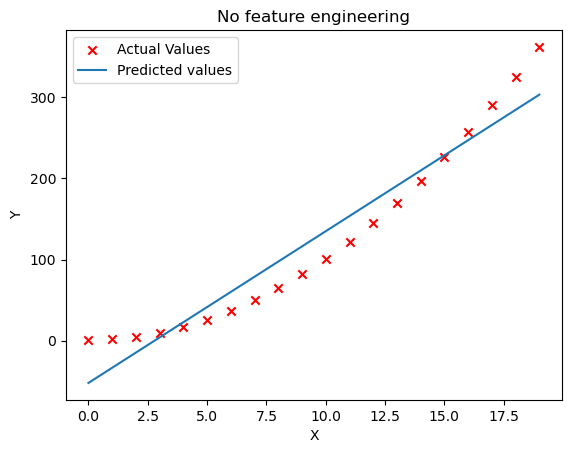

In [301]:
visplot('No feature engineering',x,y,ypred)

Not a great fit. We need a **Polynomial Feature** like $y = wx^2 + b$.

To accomplish this we need to modify the input data to engineer the needed features.

## Feature Engineering

In [302]:
# features and target data
x=np.arange(0,20,1)
y=1+x**2

# Engineer features
X=x**2

X=X.reshape(-1,1)

m,n=X.shape

print(f"Before feature engineering\n{x.reshape(-1,1)}")
print(f"After feature engineering\n{X}")

Before feature engineering
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
After feature engineering
[[  0]
 [  1]
 [  4]
 [  9]
 [ 16]
 [ 25]
 [ 36]
 [ 49]
 [ 64]
 [ 81]
 [100]
 [121]
 [144]
 [169]
 [196]
 [225]
 [256]
 [289]
 [324]
 [361]]


### Initialize Parameters

In [303]:
model_w,model_b=gradient_descent(X,y,w_in,b_in,1e-5,10000)
print(f"w: {model_w}, b: {model_b}")

Iteration:    0 	 Cost: 7329.2181
Iteration: 1000 	 Cost: 0.2248
Iteration: 2000 	 Cost: 0.2228
Iteration: 3000 	 Cost: 0.2208
Iteration: 4000 	 Cost: 0.2188
Iteration: 5000 	 Cost: 0.2168
Iteration: 6000 	 Cost: 0.2148
Iteration: 7000 	 Cost: 0.2128
Iteration: 8000 	 Cost: 0.2109
Iteration: 9000 	 Cost: 0.2090
w: [1.00417494], b: 0.04896443659681638


### Calculate predictions

In [304]:
ypred=prediction(X,model_w,model_b)
print(ypred)

[4.89644366e-02 1.05313938e+00 4.06566419e+00 9.08653889e+00
 1.61157635e+01 2.51533379e+01 3.61992622e+01 4.92535364e+01
 6.43161605e+01 8.13871345e+01 1.00466458e+02 1.21554132e+02
 1.44650156e+02 1.69754529e+02 1.96867252e+02 2.25988326e+02
 2.57117749e+02 2.90255522e+02 3.25401645e+02 3.62556117e+02]


### Visualize the fit

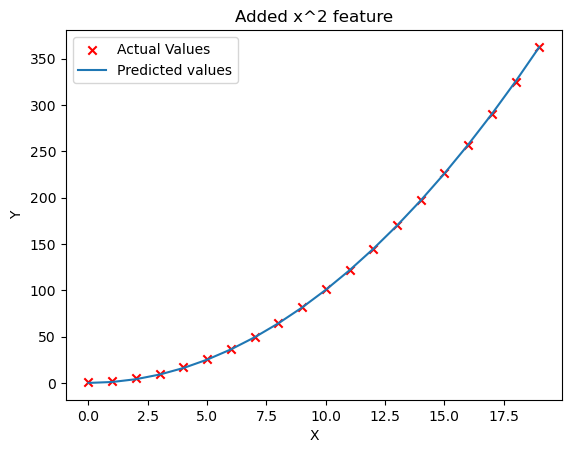

In [305]:
visplot('Added x^2 feature',x,y,ypred)

Near perfect fit

## Selecting features

- Above, we knew that an $x^2$ term was required.
- It may not always be obvious which features are required.
- One could add a variety of potential features to try and find the most useful.
- For example, what if we had instead tried : $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ? 

### Initialize Paramters

In [306]:
x=np.arange(0,20,1)
y=x**2

# Engineer features
X=np.c_[x,x**2,x**3] #create 3 columns

m,n=X.shape

w_in=np.zeros((n,))
model_w,model_b=gradient_descent(X,y,w_in,b_in,1e-7,10000)

print(f"w: {model_w}, b: {model_b}")

Iteration:    0 	 Cost: 1140.2924
Iteration: 1000 	 Cost: 328.5395
Iteration: 2000 	 Cost: 280.4434
Iteration: 3000 	 Cost: 239.3886
Iteration: 4000 	 Cost: 204.3443
Iteration: 5000 	 Cost: 174.4304
Iteration: 6000 	 Cost: 148.8960
Iteration: 7000 	 Cost: 127.0998
Iteration: 8000 	 Cost: 108.4946
Iteration: 9000 	 Cost: 92.6132
w: [0.08237526 0.53552137 0.02752216], b: 0.01056185052956357


### Calculate predictions

In [307]:
ypred=prediction(X,model_w,model_b)

### Visualize fit

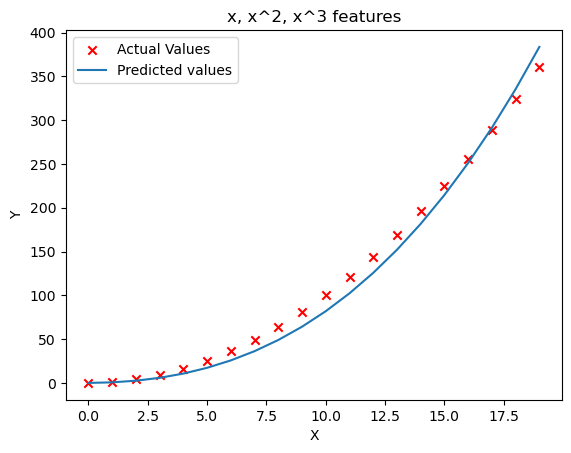

In [308]:
visplot('x, x^2, x^3 features',x,y,ypred)

- $w_0x + w_1x^2 + w_2x^3 = 0.08 + 0.54x^2 + 0.0106x^3$
- Gradient descent has emphasized the data that is the best fit to the $x^2$ data by increasing the $w_1$ term relative to the others.
- less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than the weights for $x$ or $x^3$ as it is the most useful in fitting the data. 

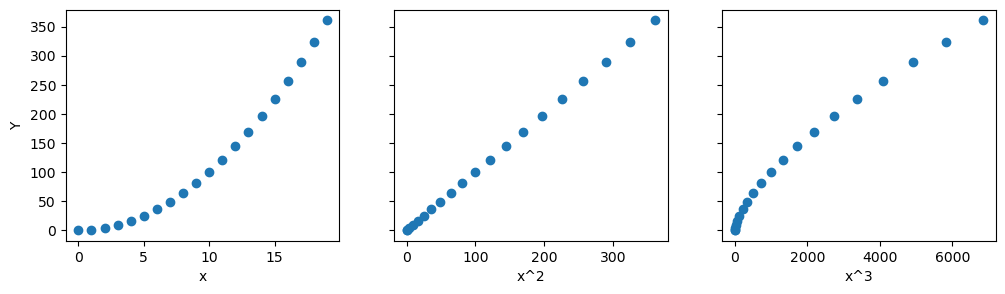

In [309]:
X_features=['x','x^2','x^3']

fig,ax=plt.subplots(1,3, figsize=(12,3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Y")
plt.show()

Above, it is clear that the $x^2$ feature mapped against the target value $y$ is linear. Linear regression can then easily generate a model using that feature.

## Scaling features
if the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. In the example above, there is $x$, $x^2$ and $x^3$ which will naturally have very different scales. Let's apply Z-score normalization to our example.

In [310]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]

m,n=X.shape

w_in=np.zeros(n)
b_in=0;

mu=np.mean(X,axis=0)
sigma=np.std(X,axis=0)

X_norm=(X-mu)/sigma

model_w,model_b=gradient_descent(X_norm,y,w_in,b_in,1e-1,100000)

print(f"w: {model_w}, b: {model_b}")

Iteration:    0 	 Cost: 9421.4668
Iteration: 10000 	 Cost: 0.3910
Iteration: 20000 	 Cost: 0.3910
Iteration: 30000 	 Cost: 0.3910
Iteration: 40000 	 Cost: 0.3910
Iteration: 50000 	 Cost: 0.3910
Iteration: 60000 	 Cost: 0.3910
Iteration: 70000 	 Cost: 0.3910
Iteration: 80000 	 Cost: 0.3910
Iteration: 90000 	 Cost: 0.3910
w: [5.26616826e-05 1.13494579e+02 8.43238778e-05], b: 123.49999999999994


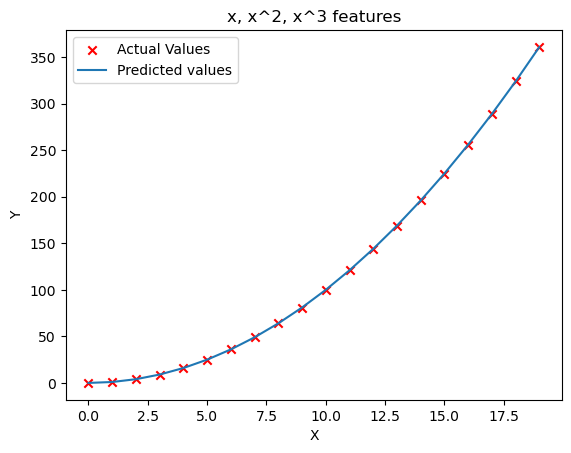

In [311]:
ypred=prediction(X_norm,model_w,model_b)
visplot('x, x^2, x^3 features',x,y,ypred)

Feature scaling allows this to converge much faster.   
Note again the values of $\mathbf{w}$. The $w_1$ term, which is the $x^2$ term is the most emphasized. Gradient descent has all but eliminated the $x^3$ term.

## Complex functions

With feature engineering, even quite complex functions can be modeled:

In [315]:
x=np.arange(0,20,1)
y=np.cos(x/2)

# Engineer features
X=np.c_[x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13]

mu=np.mean(X,axis=0)
sigma=np.std(X,axis=0)

X_norm=(X-mu)/sigma

m,n=X.shape

w_in=np.zeros((n,))
b_in=0

model_w,model_b=gradient_descent(X_norm,y,w_in,b_in,1e-1,15000)

print(f"w: {model_w}, b: {model_b}")

Iteration:    0 	 Cost: 0.2249
Iteration: 1500 	 Cost: 0.0634
Iteration: 3000 	 Cost: 0.0572
Iteration: 4500 	 Cost: 0.0532
Iteration: 6000 	 Cost: 0.0498
Iteration: 7500 	 Cost: 0.0468
Iteration: 9000 	 Cost: 0.0442
Iteration: 10500 	 Cost: 0.0427
Iteration: 12000 	 Cost: 0.0427
Iteration: 13500 	 Cost: 0.0427
w: [-3.57741127e+00  5.01558828e+00  2.32547935e+00 -1.48699755e+00
 -2.84011576e+00 -1.52839106e+00  1.73735094e+00  1.92257745e-01
  2.38313876e-03  6.33297671e-02  1.27449624e-01 -1.38296966e-01
  7.78287268e-02], b: -0.007287194855839045


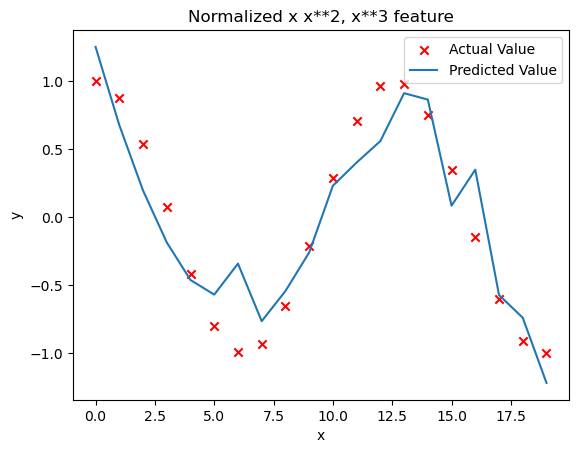

In [316]:
ypred=prediction(X_norm,model_w,model_b)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,ypred, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()
